In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load dataset
file_path = '/kaggle/input/titanic/train.csv'
df = pd.read_csv(file_path)

# Display basic information
# Display all columns
pd.set_option('display.max_columns', None)
# Display first few rows
display(df.head())
# Summary statistics
display(df.describe())
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dataset Shape: (891, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", missing_values)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


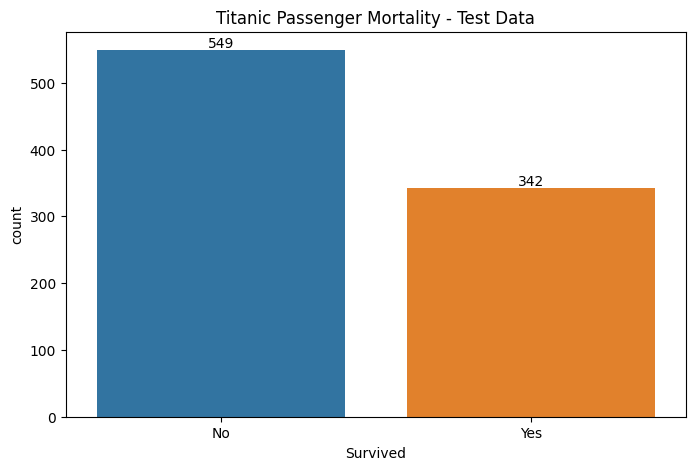

(891, 12)


In [4]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived')
plt.title("Titanic Passenger Mortality - Test Data")
plt.xlabel("Survived")
plt.ylabel("Count")
ax = sns.countplot(x='Survived', data=df)
plt.bar_label(ax.containers[0]) 
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
print(df.shape)

In [5]:
df = df.drop(columns = ["Name","Ticket","Cabin"] )
# replace null ages w/ mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
# drop null embarks 
df = df.dropna()
# Check again
missing_values = df.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", missing_values)
print(df.shape)


Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 9)


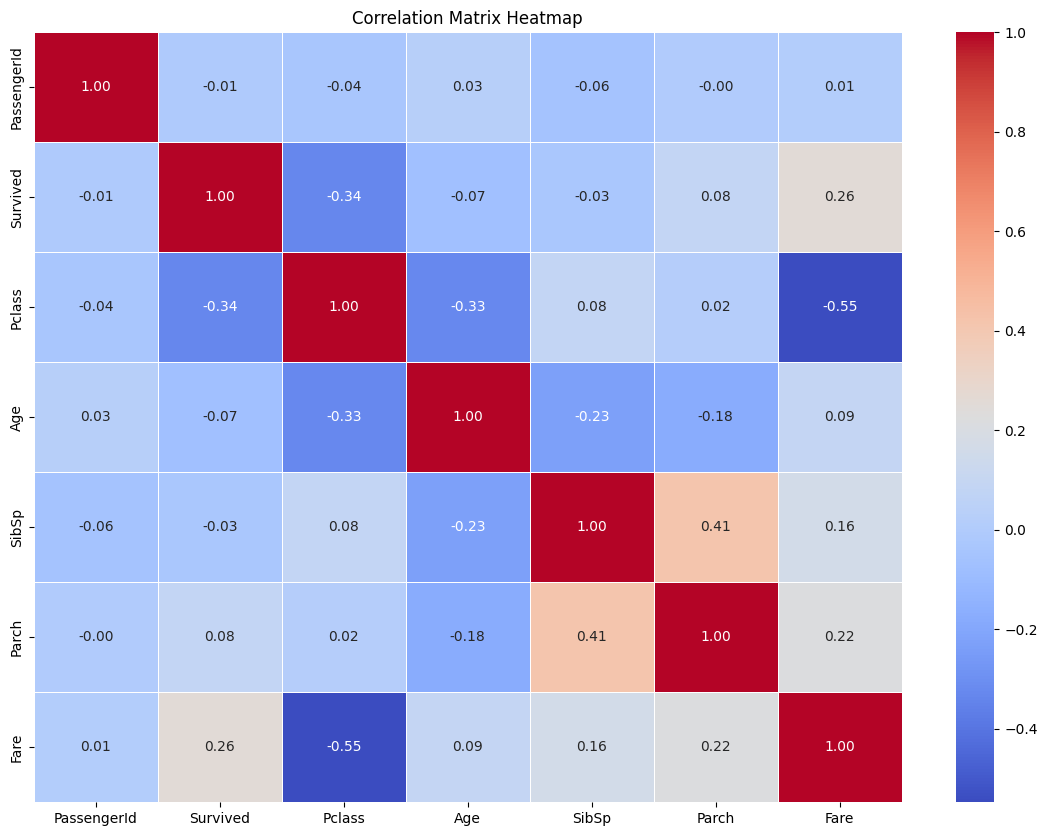

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
# reLoad dataset
# file_path = '/kaggle/input/titanic/train.csv'
# df = pd.read_csv(file_path)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


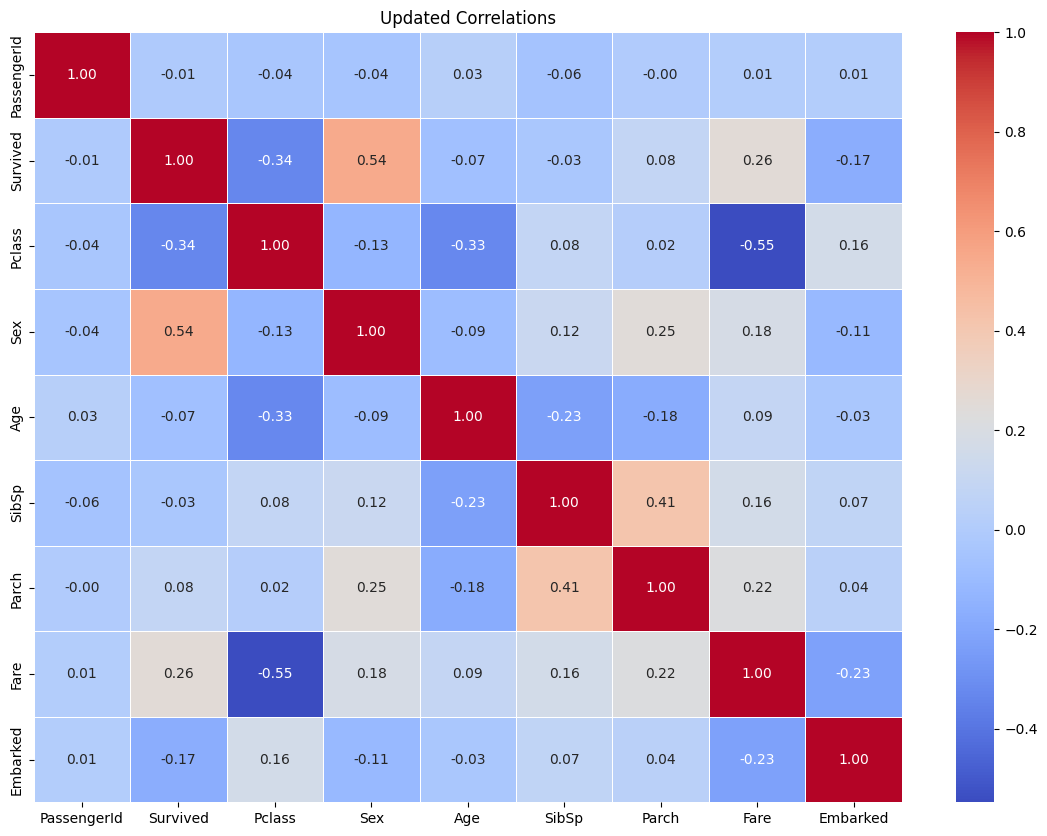

In [8]:
correlation_matrix_updated = df.corr(numeric_only=True)

# Plot updated correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Updated Correlations")
plt.show()

In [9]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [10]:
# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_clf.predict(X_test)
# Evaluate the Decision Tree model
print(len(y_pred_dt))
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

267
Decision Tree Classifier Performance:
Accuracy: 0.8239700374531835

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.78      0.74      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [11]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7902621722846442
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.75      0.66      0.70       100

    accuracy                           0.79       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267



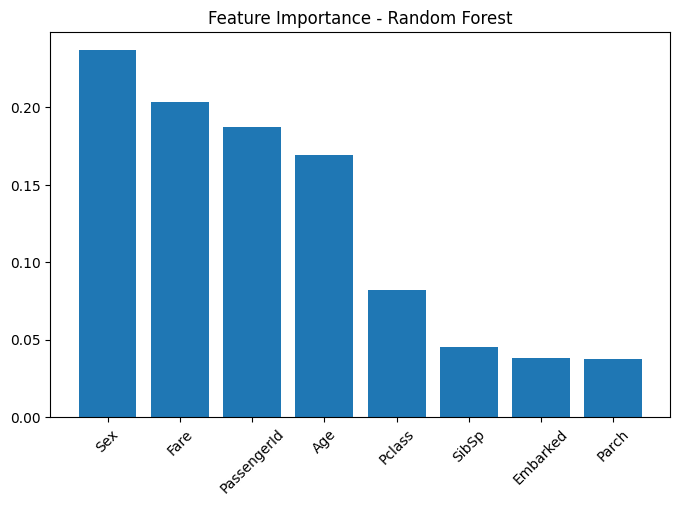

In [12]:
# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.show()

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.797752808988764
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       167
           1       0.73      0.73      0.73       100

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



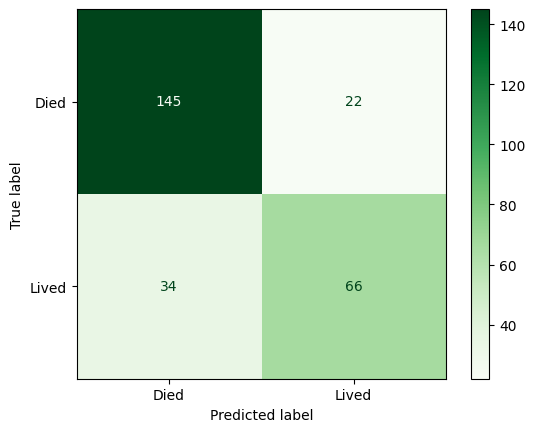

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Lived"])
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [3,5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.8456516129032258


In [16]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

print(test_data.loc[152])

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object


In [17]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,random_state=42)
rf_model.fit(X_train, y_train)

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


train_data = train_data.drop(columns = ["Name","Ticket","Cabin"] )
# replace null ages w/ mean
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
# drop null embarks 
train_data = train_data.dropna()
y = train_data["Survived"]

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

test_data = test_data.drop(columns = ["Name","Ticket","Cabin"] )
# replace null ages w/ mean
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
# drop null embarks 
test_data = test_data.dropna()


test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

features = ["Fare", "Sex", "Age", "PassengerId","Pclass","SibSp","Embarked","Parch"]


X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Random Forest Accuracy: 0.7940074906367042
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.75      0.68      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

Your submission was successfully saved!
